In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import json
import matplotlib.image

In [2]:
path_result = "../result/"
GROUPBY_folder = ["Groupby_3_result", "Groupby_5_result", "Groupby_7_result", "Groupby_9_result", "Groupby_11_result"]



We start by plotting the result of the model without augmented images

In [3]:

GROUPBY_list = [3,5,7,9,11]
ALL_MASK_list = [[0,1,2],
            [0,1,2,3,4],
            [0,2,3,5,6],
            [0,2,4,6,8],
            [0,3,5,7,10]
          ]

json_groupby = []
for i, gp in enumerate(GROUPBY_list):
    tmp = []
    for ms in ALL_MASK_list[i]:
        tmp.append(f"groupby_{gp}_maskpos_{ms}_metric.json")
    
    json_groupby.append(tmp)

In [5]:
all_result = []
for i, group in enumerate(GROUPBY_list):
    tmp=[]
    for j, ms in enumerate(ALL_MASK_list[i]):
        path_json = os.path.join("../result", GROUPBY_folder[i],json_groupby[i][j])
        with open(path_json) as json_file:
            json_data = json.load(json_file)
            df_data = pd.DataFrame.from_dict(json_data,orient='index')
        tmp.append(df_data)
    all_result.append(tmp)    

In [6]:
tt = all_result[0][0]
tt.reset_index()

,index,train_accuracy,train_loss,train_IoU,train_epoch_time,val_accuracy,val_loss,val_IoU,val_epoch_time
0,0,93.672818,0.688637,70.110500,49.303835,99.135762,0.688424,89.510298,24.155286
1,1,98.569763,0.685220,89.337373,14.310333,99.097437,0.687171,89.197922,2.261681
2,2,98.441720,0.685202,88.581038,14.301093,99.280274,0.687284,90.960735,2.244446
3,3,97.245151,0.683710,82.474649,14.180998,99.331295,0.686637,91.566211,2.255283
4,4,95.262033,0.682539,75.088978,14.305747,99.187320,0.685622,90.071261,2.281840
5,5,97.631258,0.682450,84.304380,14.213085,99.256140,0.685001,90.892804,2.264058
6,6,97.148889,0.682444,82.061934,14.374071,99.196774,0.686234,90.164679,2.289793
7,7,97.282088,0.682412,82.681048,14.314646,99.298030,0.685332,91.236579,2.250361
8,8,96.714485,0.682412,80.235064,14.375110,99.191731,0.685728,90.160340,2.288292
9,9,95.791292,0.682531,76.804709,14.280945,99.237281,0.684543,90.740454,2.241076


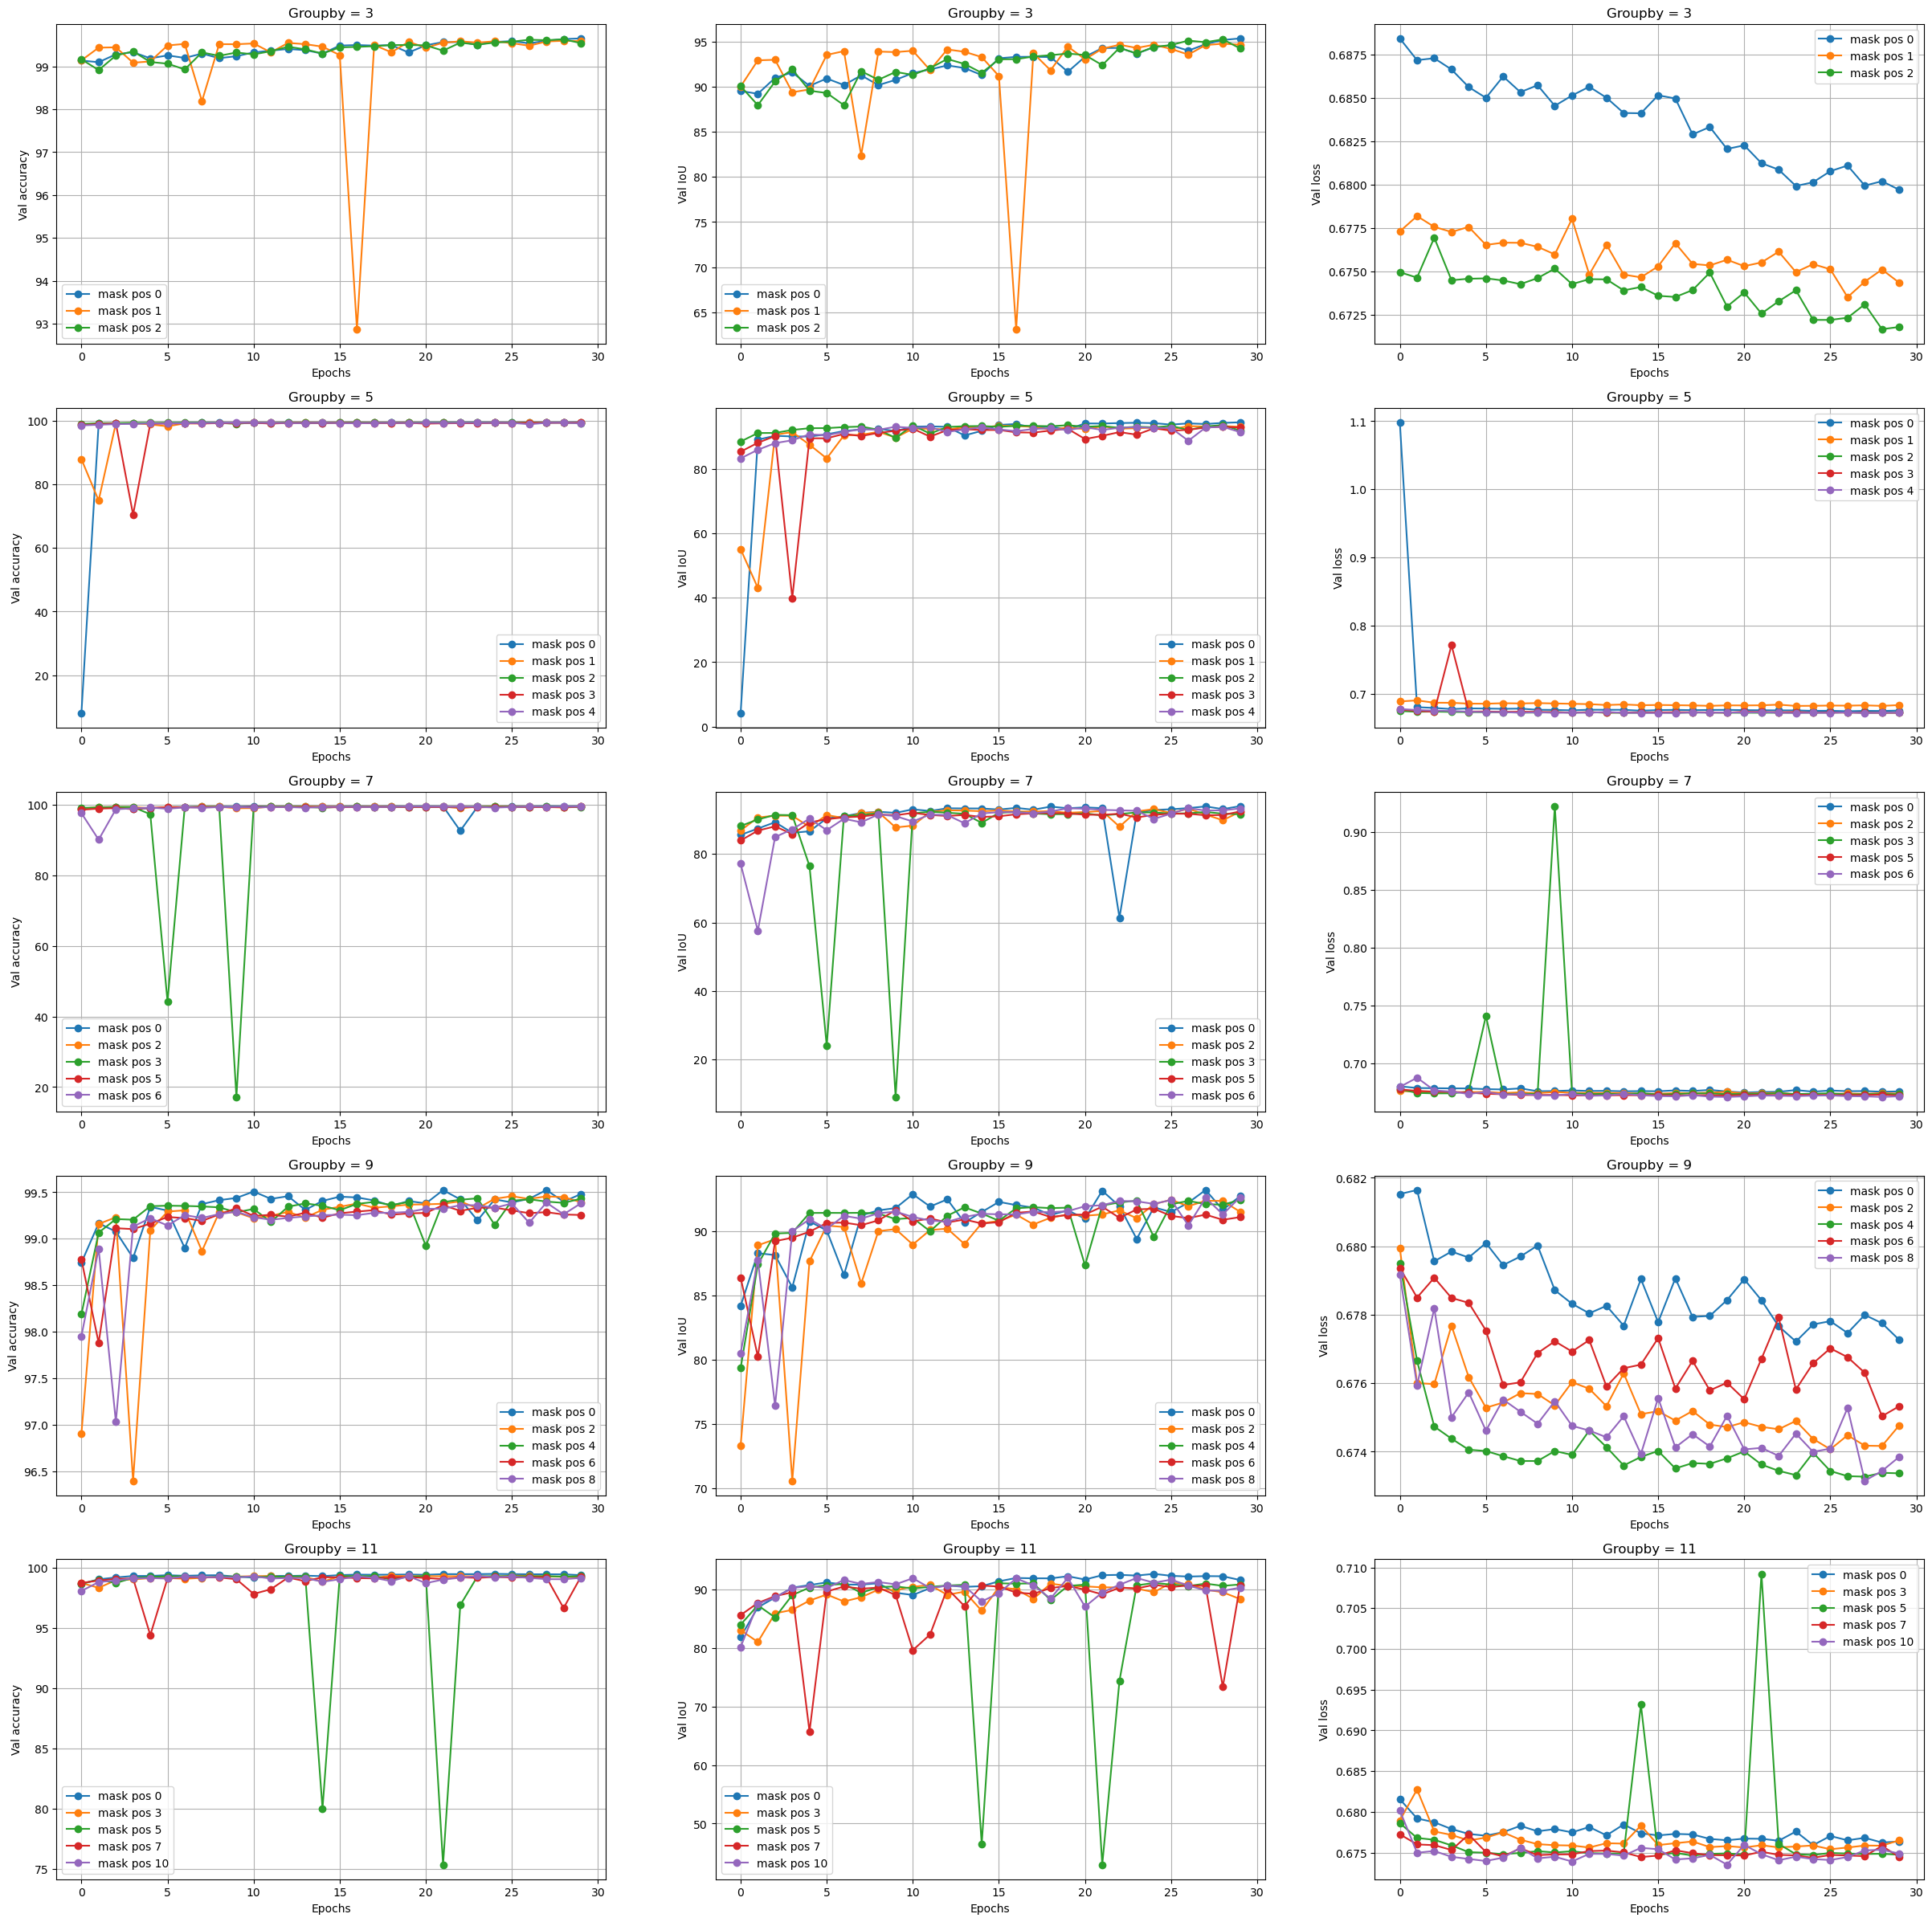

In [7]:
fig , ax = plt.subplots(len(GROUPBY_list), 3, figsize=(30,30))
for i, group in enumerate(GROUPBY_list):
    mask_pos_list = []
    for j, ms in enumerate(ALL_MASK_list[i]):
        df = all_result[i][j]
        df = df.reset_index()
        ax1 = df.val_accuracy.plot.line(x='index',y='val_accuracy', ax = ax[i][0],style='-o', grid = True)
        ax2 = df.val_IoU.plot.line(x='index',y='val_IoU', ax = ax[i][1],style='-o', grid = True)
        ax3 = df.val_loss.plot.line(x='index',y='val_loss', ax = ax[i][2],style='-o', grid = True)
        ax1.set_xlabel("Epochs")
        ax1.set_ylabel("Val accuracy")
        
        ax2.set_xlabel("Epochs")
        ax2.set_ylabel("Val IoU")
        
        ax3.set_xlabel("Epochs")
        ax3.set_ylabel("Val loss")

        ax1.set_title(f"Groupby = {group}")
        ax2.set_title(f"Groupby = {group}")
        ax3.set_title(f"Groupby = {group}")

        mask_pos_list.append(f"mask pos {ms}")
    
    ax1.legend(mask_pos_list)
    ax2.legend(mask_pos_list)
    ax3.legend(mask_pos_list)



We find the highest IoU with groupby at 3 and 7. Now let's evaluate the best mask position for these two values

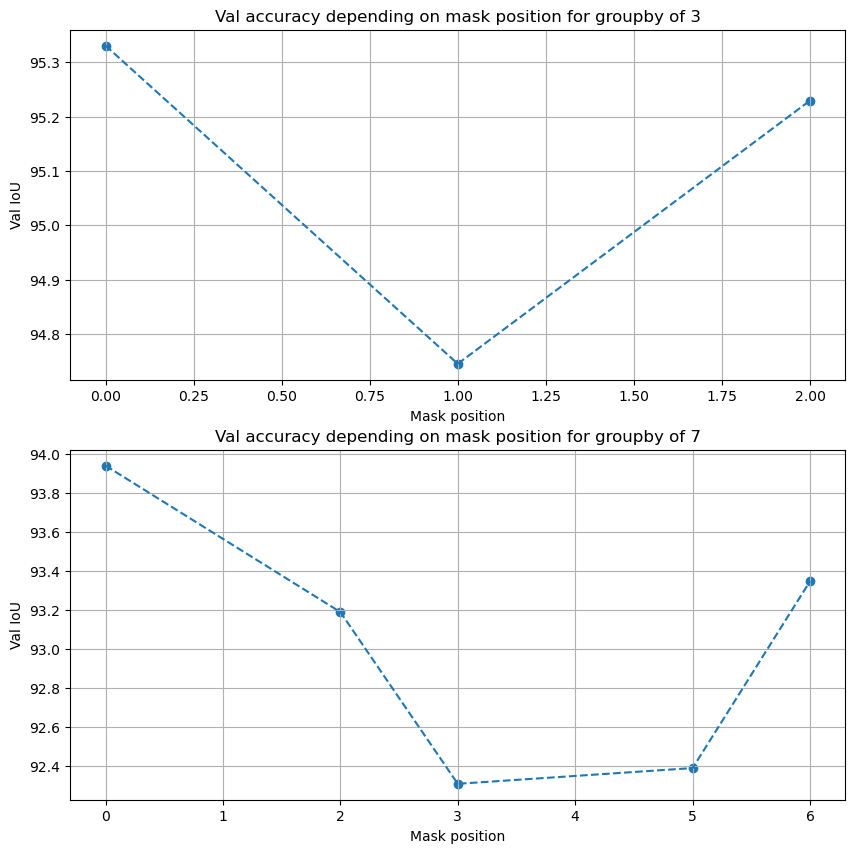

In [8]:
fig , ax = plt.subplots(2, figsize = (10,10))
groupby_sel_index = [0,2]
for i, group in enumerate(groupby_sel_index):
    tmp = []
    for j, ms in enumerate(ALL_MASK_list[group]):
        df = all_result[group][j]
        tmp.append(max(df.val_IoU))
    
    ax[i].scatter(ALL_MASK_list[group], tmp)
    ax[i].plot(ALL_MASK_list[group], tmp, "--")
    ax[i].grid()
    ax[i].set_xlabel("Mask position")
    ax[i].set_ylabel("Val IoU")
    ax[i].set_title(f"Val accuracy depending on mask position for groupby of {GROUPBY_list[group]}")







We see that for the both value, the mask position that return the best IoU is the first one.

In [9]:
GROUPBY_folder_augmented = ["Groupby_3_result_augmented","Groupby_7_result_augmented" ]
GROUPBY_list_augmented = [3,7]
ALL_MASK_list = [[0,1,2],
            [0,2,3,5,6]
          ]

json_groupby_augmented = []
for i, gp in enumerate(GROUPBY_list_augmented):
    tmp = []
    for ms in ALL_MASK_list[i]:
        tmp.append(f"groupby_{gp}_maskpos_{ms}_metric_augmented.json")
    
    json_groupby_augmented.append(tmp)

In [10]:
all_result_augmented = []
for i, group in enumerate(GROUPBY_list_augmented):
    tmp=[]
    for j, ms in enumerate(ALL_MASK_list[i]):
        path_json = os.path.join("../result", GROUPBY_folder_augmented[i],json_groupby_augmented[i][j])
        with open(path_json) as json_file:
            json_data = json.load(json_file)
            df_data = pd.DataFrame.from_dict(json_data,orient='index')
        tmp.append(df_data)
    all_result_augmented.append(tmp) 

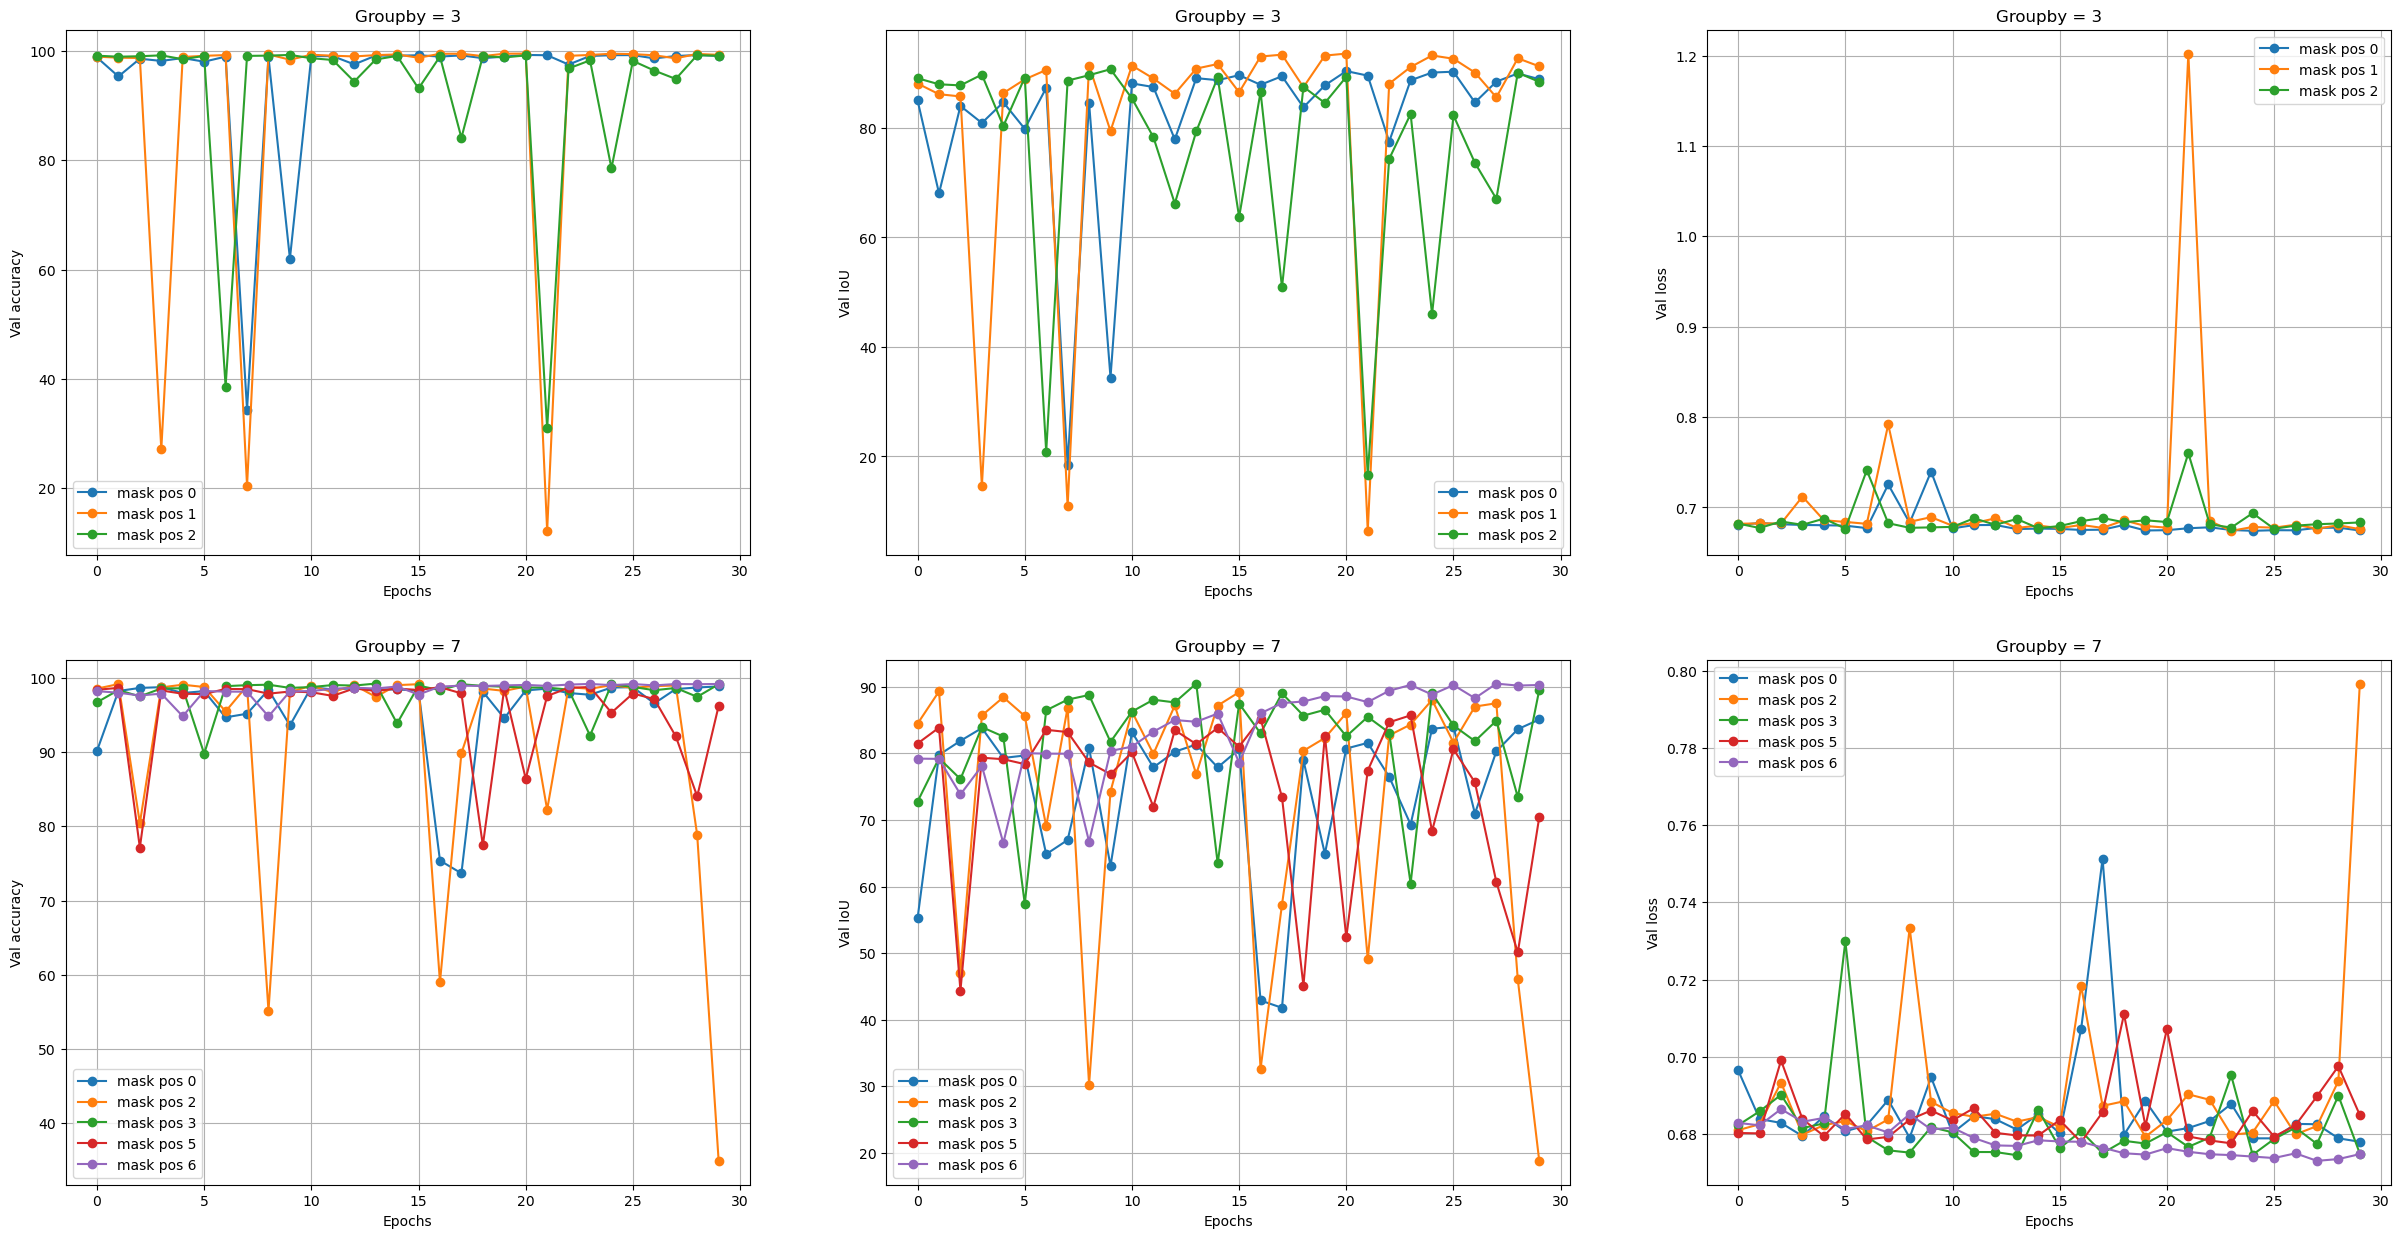

In [11]:
fig , ax = plt.subplots(len(GROUPBY_list_augmented), 3, figsize=(30,15))
for i, group in enumerate(GROUPBY_list_augmented):
    mask_pos_list = []
    for j, ms in enumerate(ALL_MASK_list[i]):
        df = all_result_augmented[i][j]
        df = df.reset_index()
        ax1 = df.val_accuracy.plot.line(x='index',y='val_accuracy', ax = ax[i][0],style='-o', grid = True)
        ax2 = df.val_IoU.plot.line(x='index',y='val_IoU', ax = ax[i][1],style='-o', grid = True)
        ax3 = df.val_loss.plot.line(x='index',y='val_loss', ax = ax[i][2],style='-o', grid = True)
        ax1.set_xlabel("Epochs")
        ax1.set_ylabel("Val accuracy")
        
        ax2.set_xlabel("Epochs")
        ax2.set_ylabel("Val IoU")
        
        ax3.set_xlabel("Epochs")
        ax3.set_ylabel("Val loss")

        ax1.set_title(f"Groupby = {group}")
        ax2.set_title(f"Groupby = {group}")
        ax3.set_title(f"Groupby = {group}")

        mask_pos_list.append(f"mask pos {ms}")
    
    ax1.legend(mask_pos_list)
    ax2.legend(mask_pos_list)
    ax3.legend(mask_pos_list)


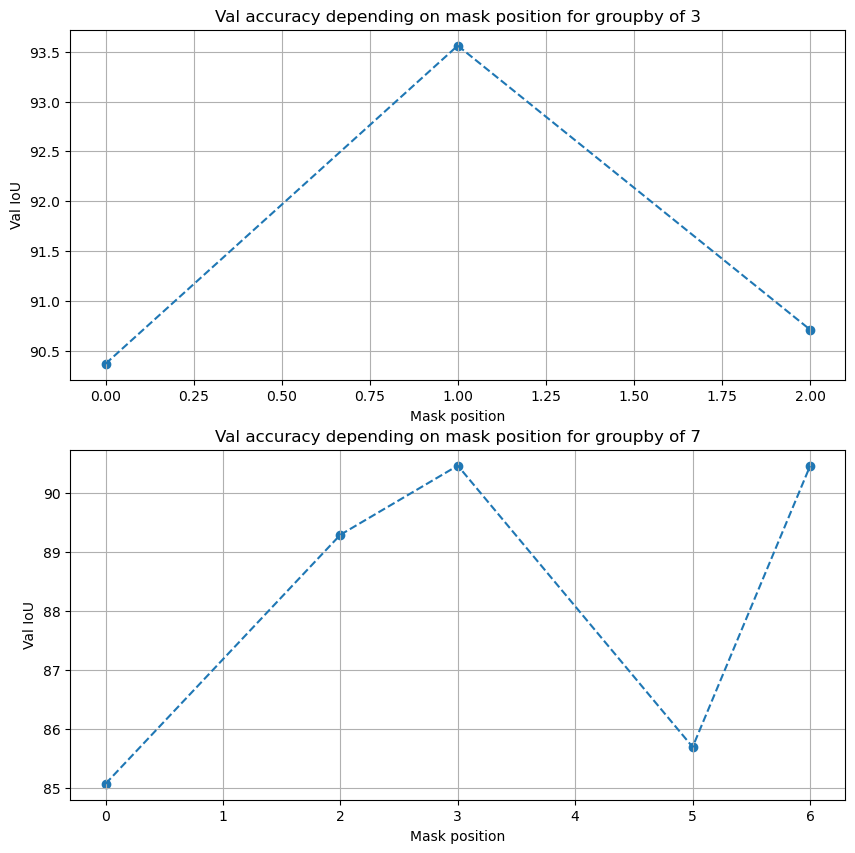

In [12]:
fig , ax = plt.subplots(2, figsize = (10,10))
groupby_sel_index = [0,1]
for i, group in enumerate(groupby_sel_index):
    tmp = []
    for j, ms in enumerate(ALL_MASK_list[group]):
        df = all_result_augmented[group][j]
        tmp.append(max(df.val_IoU))
    
    ax[i].scatter(ALL_MASK_list[group], tmp)
    ax[i].plot(ALL_MASK_list[group], tmp, "--")
    ax[i].grid()
    ax[i].set_xlabel("Mask position")
    ax[i].set_ylabel("Val IoU")
    ax[i].set_title(f"Val accuracy depending on mask position for groupby of {GROUPBY_list_augmented[group]}")





# Groupby 1,3 and 5 with 50 epochs and with augmented data

In [19]:
GROUPBY_folder = ["Groupby_1_result_50_epoch", "Groupby_3_result_50_epoch", "Groupby_5_result_50_epoch"]
GROUPBY_list = [1,3,5]
ALL_MASK_list = [[0],
            [0,1,2],
            [0,1,2,3,4]  
          ]


json_groupby = []
for i, gp in enumerate(GROUPBY_list):
    tmp = []
    for ms in ALL_MASK_list[i]:
        tmp.append(f"groupby_{gp}_maskpos_{ms}_metric.json")
    
    json_groupby.append(tmp)

In [20]:
all_result = []
for i, group in enumerate(GROUPBY_list):
    tmp=[]
    for j, ms in enumerate(ALL_MASK_list[i]):
        path_json = os.path.join("../result", GROUPBY_folder[i],json_groupby[i][j])
        with open(path_json) as json_file:
            json_data = json.load(json_file)
            df_data = pd.DataFrame.from_dict(json_data,orient='index')
        tmp.append(df_data)
    all_result.append(tmp) 

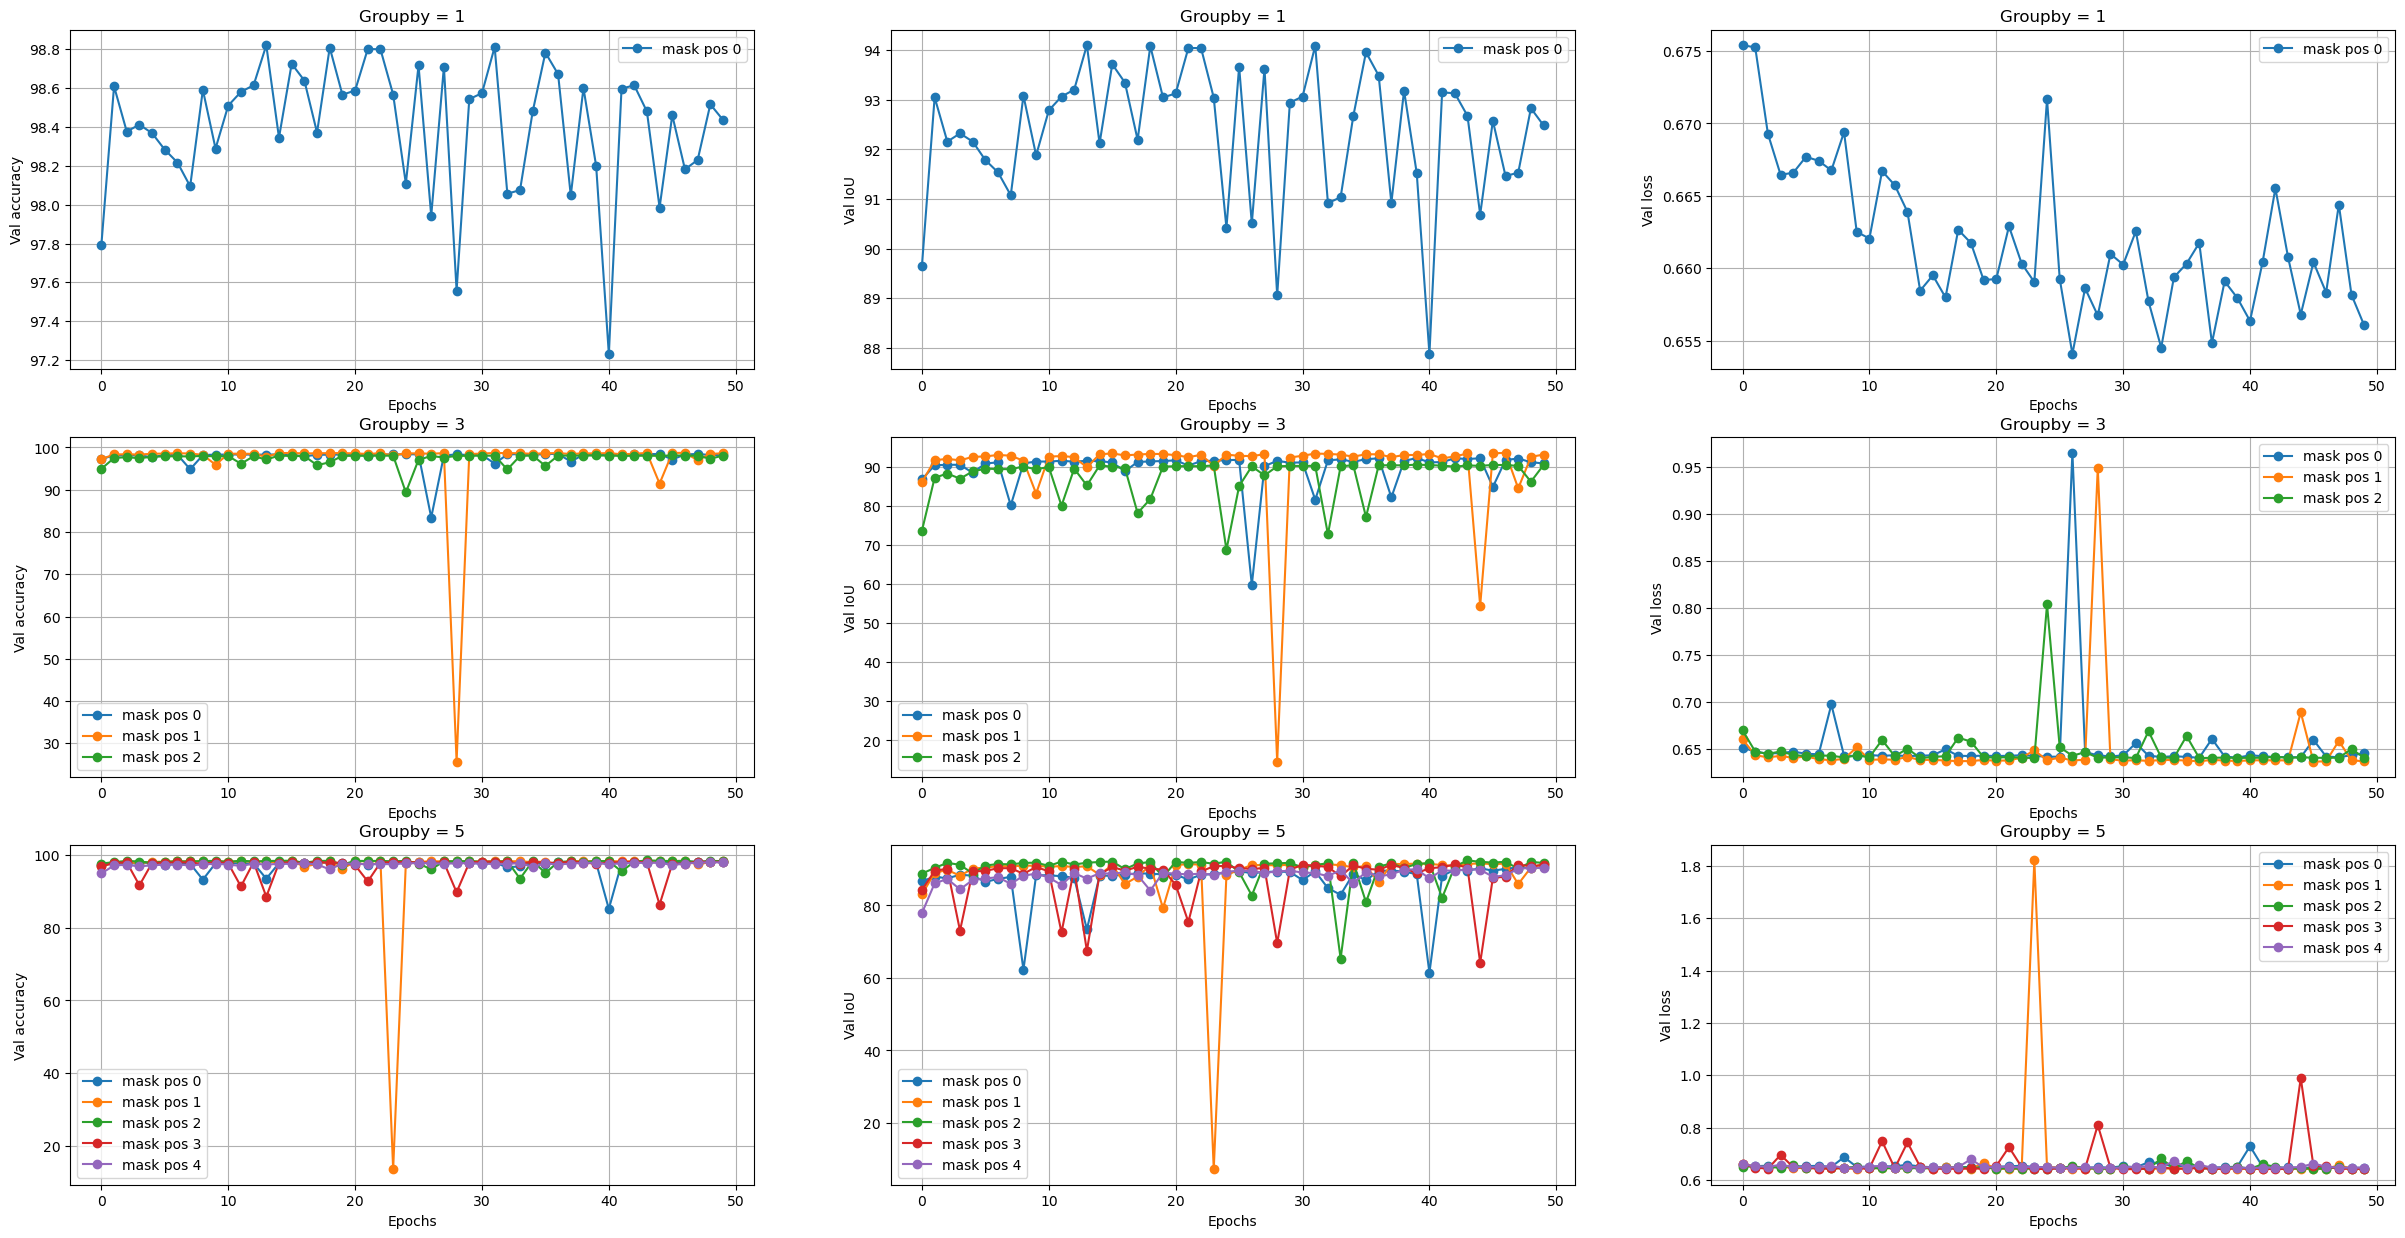

In [21]:
fig , ax = plt.subplots(len(GROUPBY_list), 3, figsize=(30,15))
for i, group in enumerate(GROUPBY_list):
    mask_pos_list = []
    for j, ms in enumerate(ALL_MASK_list[i]):
        df = all_result[i][j]
        df = df.reset_index()
        ax1 = df.val_accuracy.plot.line(x='index',y='val_accuracy', ax = ax[i][0],style='-o', grid = True)
        ax2 = df.val_IoU.plot.line(x='index',y='val_IoU', ax = ax[i][1],style='-o', grid = True)
        ax3 = df.val_loss.plot.line(x='index',y='val_loss', ax = ax[i][2],style='-o', grid = True)
        ax1.set_xlabel("Epochs")
        ax1.set_ylabel("Val accuracy")
        
        ax2.set_xlabel("Epochs")
        ax2.set_ylabel("Val IoU")
        
        ax3.set_xlabel("Epochs")
        ax3.set_ylabel("Val loss")

        ax1.set_title(f"Groupby = {group}")
        ax2.set_title(f"Groupby = {group}")
        ax3.set_title(f"Groupby = {group}")

        mask_pos_list.append(f"mask pos {ms}")
    
    ax1.legend(mask_pos_list)
    ax2.legend(mask_pos_list)
    ax3.legend(mask_pos_list)

In [27]:
all_result[2][0]

,train_accuracy,train_loss,train_IoU,train_epoch_time,val_accuracy,val_loss,val_IoU,val_epoch_time
0,65.746069,0.706802,35.432264,15.063605,97.349948,0.659231,86.630893,3.648967
1,98.205030,0.680557,77.938080,14.588557,97.640163,0.653111,87.961435,3.621074
2,98.768413,0.679614,82.664198,14.718184,97.619033,0.654872,87.446761,3.589685
3,99.155813,0.679461,86.763144,14.829254,97.784543,0.650240,88.466322,3.607375
4,98.836577,0.679192,83.376575,14.831704,97.732699,0.651521,88.184536,3.632581
5,99.398524,0.678902,89.906913,14.695798,97.122407,0.653378,86.490077,3.612846
6,98.743230,0.679378,82.428110,14.593100,97.635424,0.654379,87.307227,3.640198
7,98.421496,0.681096,79.358786,14.658101,97.582567,0.650373,87.864077,3.659339
8,99.062455,0.679228,85.765982,14.688367,93.209934,0.687490,62.261760,3.607648
9,99.260175,0.678962,88.057137,14.729357,97.709495,0.650322,88.357067,3.650803


highest IoU of groupby = 1:  94.10199522972107


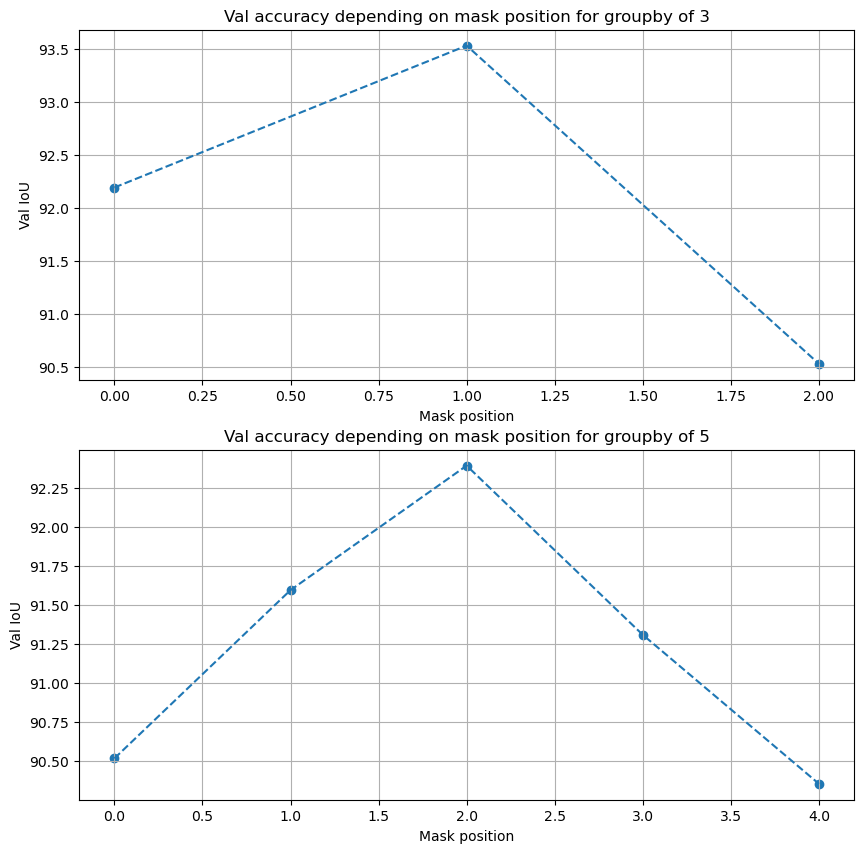

In [29]:
fig , ax = plt.subplots(2, figsize = (10,10))
groupby_sel_index = [1,2]
for i, group in enumerate(groupby_sel_index):
    tmp = []
    for j, ms in enumerate(ALL_MASK_list[group]):
        df = all_result[group][j]
        tmp.append(max(df.val_IoU))
    
    ax[i].scatter(ALL_MASK_list[group], tmp)
    ax[i].plot(ALL_MASK_list[group], tmp, "--")
    ax[i].grid()
    ax[i].set_xlabel("Mask position")
    ax[i].set_ylabel("Val IoU")
    ax[i].set_title(f"Val accuracy depending on mask position for groupby of {GROUPBY_list[group]}")


print("highest IoU of groupby = 1: ", max(all_result[0][0].val_IoU))
